# Joint Network Model evaluation

In [8]:
from interp.models import DummyJointModel
from interp.train import evaluate_joint
from interp.dataset import HDF5Dataset, nested_custom_collate
from torch.utils.data import DataLoader
import os

alg = "dijkstra_bfs"
data_source = os.path.join("data", alg)

val_dataset_ood = HDF5Dataset(os.path.join("data", alg, "interp_data_OOD_eval.h5"), nested=True)
val_dataloader_ood = DataLoader(val_dataset_ood, batch_size=4, shuffle=True, collate_fn=nested_custom_collate)
val_dataset_16 = HDF5Dataset(os.path.join("data", alg, "interp_data_16_eval.h5"), nested=True)
val_dataloader_16 = DataLoader(val_dataset_16, batch_size=4, shuffle=True, collate_fn=nested_custom_collate)
val_dataset_8 = HDF5Dataset(os.path.join("data", alg, "interp_data_8_eval.h5"), nested=True)
val_dataloader_8 = DataLoader(val_dataset_8, batch_size=4, shuffle=True, collate_fn=nested_custom_collate) 
val_dataset_all = HDF5Dataset(os.path.join("data", alg, "interp_data_all_eval.h5"), nested=True)
val_dataloader_all = DataLoader(val_dataset_all, batch_size=4, shuffle=True, collate_fn=nested_custom_collate)


In [9]:
from interp.metric import LossFunction

loss_fn = LossFunction()

m = DummyJointModel()
print("performing evaluation on OOD dataset")
print(evaluate_joint(m, val_dataloader_ood, "cpu", loss_fn=loss_fn))
print("performing evaluation on 16 dataset")
print(evaluate_joint(m, val_dataloader_16, "cpu", loss_fn=loss_fn))
print("performing evaluation on 8 dataset")
print(evaluate_joint(m, val_dataloader_8, "cpu", loss_fn=loss_fn))
print("performing evaluation on all dataset")
print(evaluate_joint(m, val_dataloader_all, "cpu", loss_fn=loss_fn))


performing evaluation on OOD dataset
(4.419271686270003, {'bfs': 4.831885993480682, 'dijkstra': 4.006657379059323})
performing evaluation on 16 dataset
(3.00879943821453, {'bfs': 3.1515337050800594, 'dijkstra': 2.8660651713490006})
performing evaluation on 8 dataset
(2.4443744454821736, {'bfs': 2.456579927390306, 'dijkstra': 2.4321689635740418})
performing evaluation on all dataset
(2.794015257826638, {'bfs': 2.7894247710534548, 'dijkstra': 2.7986057445998216})


In [10]:
from interp.config import create_model_from_config, load_config
import torch

model_name = "gnn_small_all"
checkpoint_source = os.path.join("interp_checkpoints", alg, model_name)

config = load_config(os.path.join(checkpoint_source, model_name + "_config.json"))
model = create_model_from_config(config)

model.load_state_dict(torch.load(os.path.join(checkpoint_source, model_name + ".pth")))
model.eval()

print("performing evaluation on OOD dataset")
print(evaluate_joint(model, val_dataloader_ood, "cpu", loss_fn=loss_fn))
print("performing evaluation on 16 dataset")
print(evaluate_joint(model, val_dataloader_16, "cpu", loss_fn=loss_fn))
print("performing evaluation on 8 dataset")
print(evaluate_joint(model, val_dataloader_8, "cpu", loss_fn=loss_fn))
print("performing evaluation on all dataset")
print(evaluate_joint(model, val_dataloader_all, "cpu", loss_fn=loss_fn))

performing evaluation on OOD dataset
(0.21698326880782787, {'bfs': 0.3137901363661513, 'dijkstra': 0.12017640124950443})
performing evaluation on 16 dataset
(0.02560445817539776, {'bfs': 0.0013752583088693056, 'dijkstra': 0.049833658041926215})
performing evaluation on 8 dataset
(0.005361087691905435, {'bfs': 0.002109082154379258, 'dijkstra': 0.008613093229431613})
performing evaluation on all dataset
(0.0202791467158948, {'bfs': 0.0008744109006917879, 'dijkstra': 0.03968388253109781})


# Single algorithm training evaluation

In [11]:
from interp.models import DummyModel
from interp.train import evaluate
from interp.dataset import HDF5Dataset, custom_collate
from torch.utils.data import DataLoader
import os

alg = "bfs"
data_source = os.path.join("data", alg)

val_dataset_ood = HDF5Dataset(os.path.join("data", alg, "interp_data_OOD_eval.h5"), nested=False)
val_dataloader_ood = DataLoader(val_dataset_ood, batch_size=4, shuffle=True, collate_fn=custom_collate)
val_dataset_16 = HDF5Dataset(os.path.join("data", alg, "interp_data_16_eval.h5"), nested=False)
val_dataloader_16 = DataLoader(val_dataset_16, batch_size=4, shuffle=True, collate_fn=custom_collate)
val_dataset_8 = HDF5Dataset(os.path.join("data", alg, "interp_data_8_eval.h5"), nested=False)
val_dataloader_8 = DataLoader(val_dataset_8, batch_size=4, shuffle=True, collate_fn=custom_collate) 
val_dataset_all = HDF5Dataset(os.path.join("data", alg, "interp_data_all_eval.h5"), nested=False)
val_dataloader_all = DataLoader(val_dataset_all, batch_size=4, shuffle=True, collate_fn=custom_collate)

In [12]:
from interp.metric import LossFunction

loss_fn = LossFunction()

m = DummyModel()
print("performing evaluation on OOD dataset")
print(evaluate(m, val_dataloader_ood, "cpu", loss_fn=loss_fn))
print("performing evaluation on 16 dataset")
print(evaluate(m, val_dataloader_16, "cpu", loss_fn=loss_fn))
print("performing evaluation on 8 dataset")
print(evaluate(m, val_dataloader_8, "cpu", loss_fn=loss_fn))
print("performing evaluation on all dataset")
print(evaluate(m, val_dataloader_all, "cpu", loss_fn=loss_fn))

performing evaluation on OOD dataset
4.856802121775684
performing evaluation on 16 dataset
3.1427911783485722
performing evaluation on 8 dataset
2.455556582431404
performing evaluation on all dataset
2.738420484909816


In [13]:
from interp.config import create_model_from_config, load_config
import torch

model_name = "gnn_small_all"
checkpoint_source = os.path.join("interp_checkpoints", alg, model_name)

config = load_config(os.path.join(checkpoint_source, model_name + "_config.json"))
model = create_model_from_config(config)

model.load_state_dict(torch.load(os.path.join(checkpoint_source, model_name + ".pth")))
model.eval()

print("performing evaluation on OOD dataset")
print(evaluate(model, val_dataloader_ood, "cpu", loss_fn=loss_fn))
print("performing evaluation on 16 dataset")
print(evaluate(model, val_dataloader_16, "cpu", loss_fn=loss_fn))
print("performing evaluation on 8 dataset")
print(evaluate(model, val_dataloader_8, "cpu", loss_fn=loss_fn))
print("performing evaluation on all dataset")
print(evaluate(model, val_dataloader_all, "cpu", loss_fn=loss_fn))

performing evaluation on OOD dataset
0.026492700778411586
performing evaluation on 16 dataset
0.0010275790928658862
performing evaluation on 8 dataset
0.0003381849296357719
performing evaluation on all dataset
0.0010186307649063004


# Visualisation

## Getting singular model stats

Evaluating: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


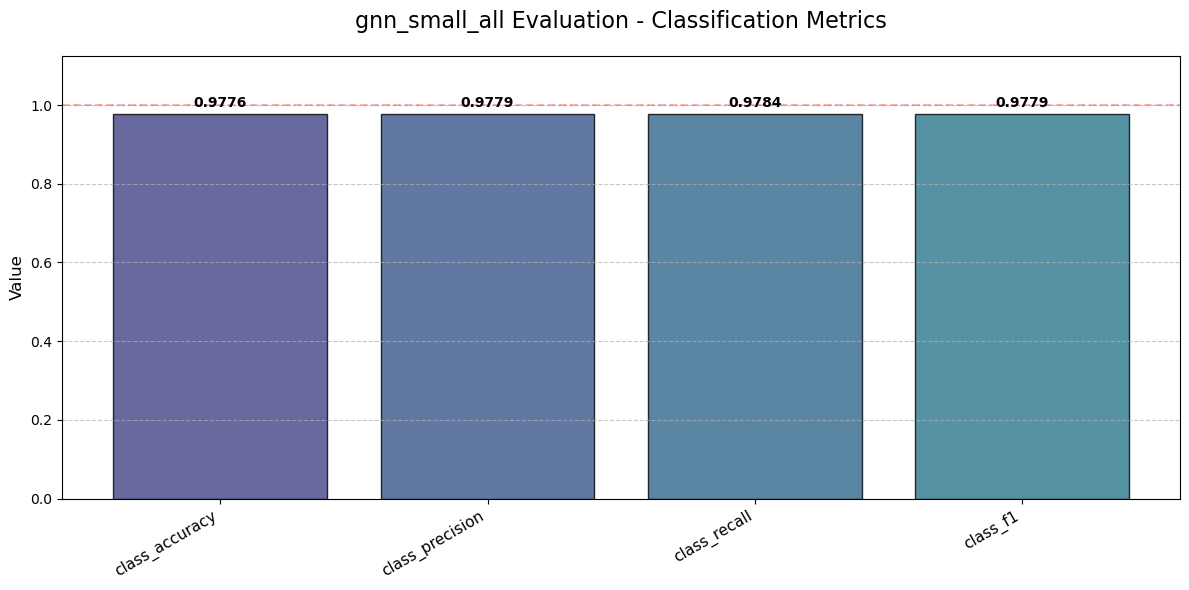

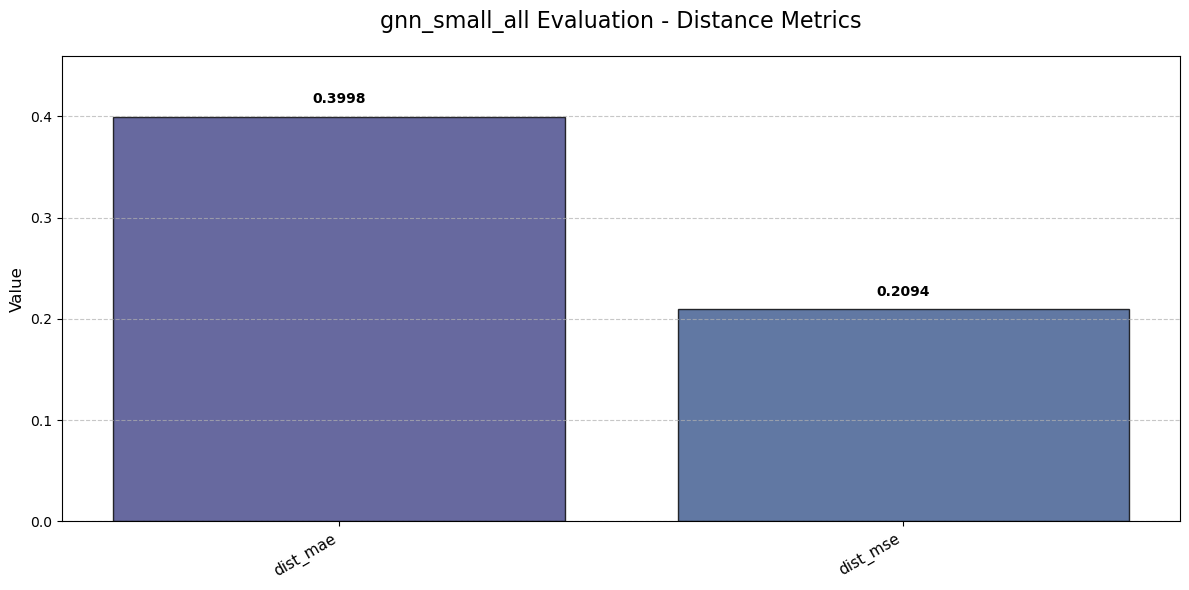

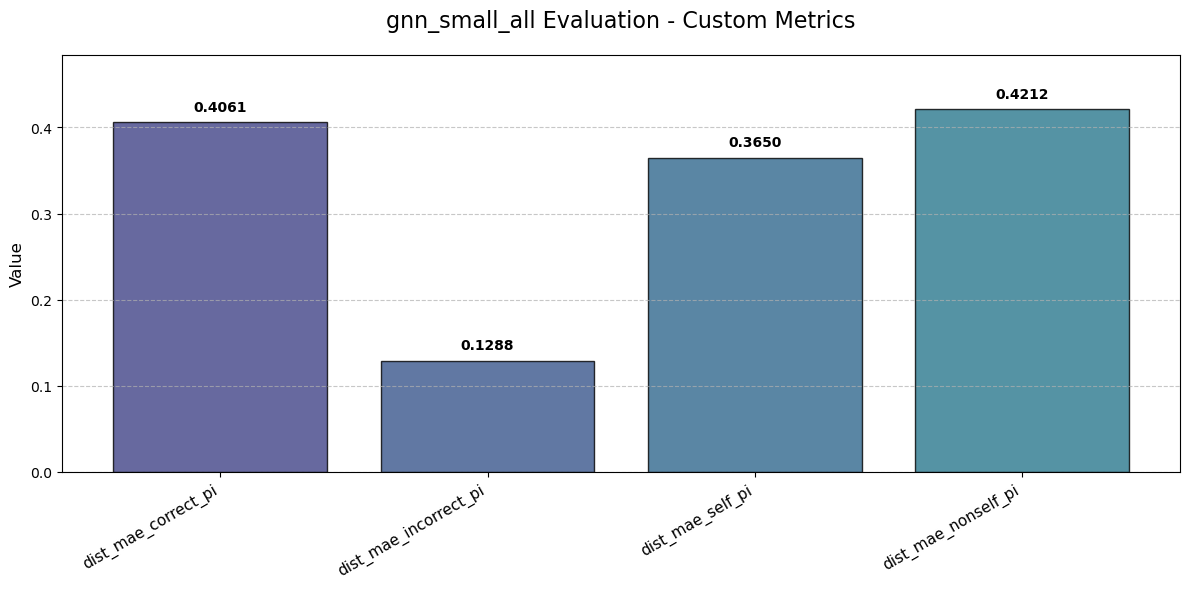

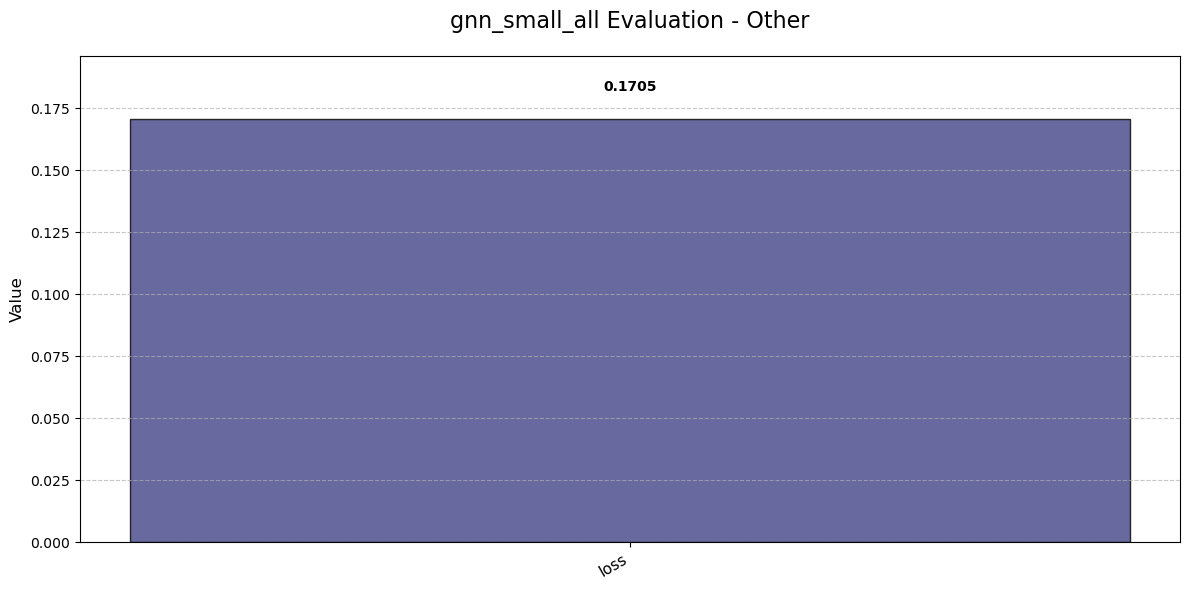

In [17]:
from interp.config import load_config, create_model_from_config
from interp.evaluation import evaluate_model_on_dataset, visualize_results
import torch
import os

# Path to the saved model and its configuration
checkpoint_dir = "interp_checkpoints/dijkstra/gnn_small_all"
model_name = "gnn_small_all"
config_path = os.path.join(checkpoint_dir, f"{model_name}_config.json")
model_path = os.path.join(checkpoint_dir, f"{model_name}.pth")

# Load the configuration
config = load_config(config_path)

# Create the model from the configuration
model = create_model_from_config(config)

# Load the saved weights
model.load_state_dict(torch.load(model_path))

# Evaluate the model
results = evaluate_model_on_dataset(
    model, 
    dataset_path="data/dijkstra/interp_data_OOD_eval.h5",
    batch_size=16
)

# Visualize the results
visualize_results(results, title=f"{model_name} Evaluation")

## Comparing Multiple Models

## Visualise examples

Performing comprehensive model behavior analysis...


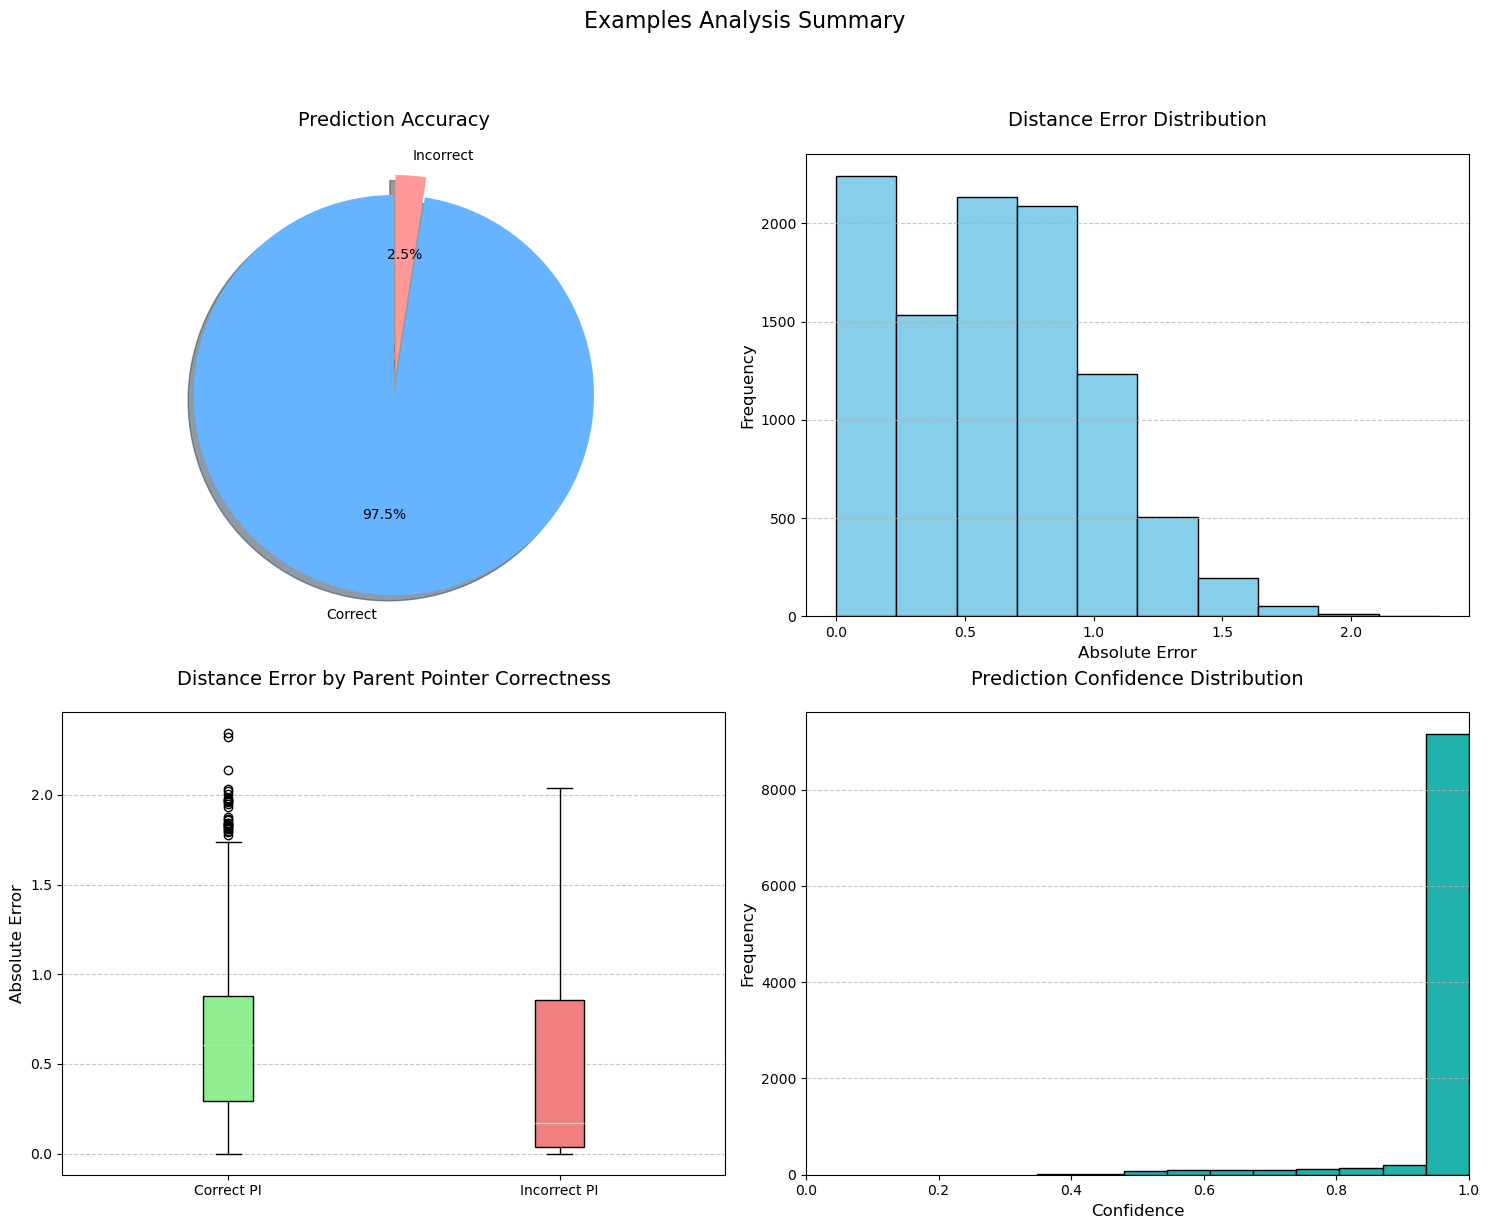


===== Model Behavior Analysis =====
Number of examples analyzed: 10000
Accuracy: 0.9752
Average distance error: 0.6027
Average distance error (correct PI): 0.6065
Average distance error (incorrect PI): 0.4537
Average confidence: 0.9754
Average confidence (correct): 0.9826
Average confidence (incorrect): 0.6926


Visualizing example 1 (correct)...


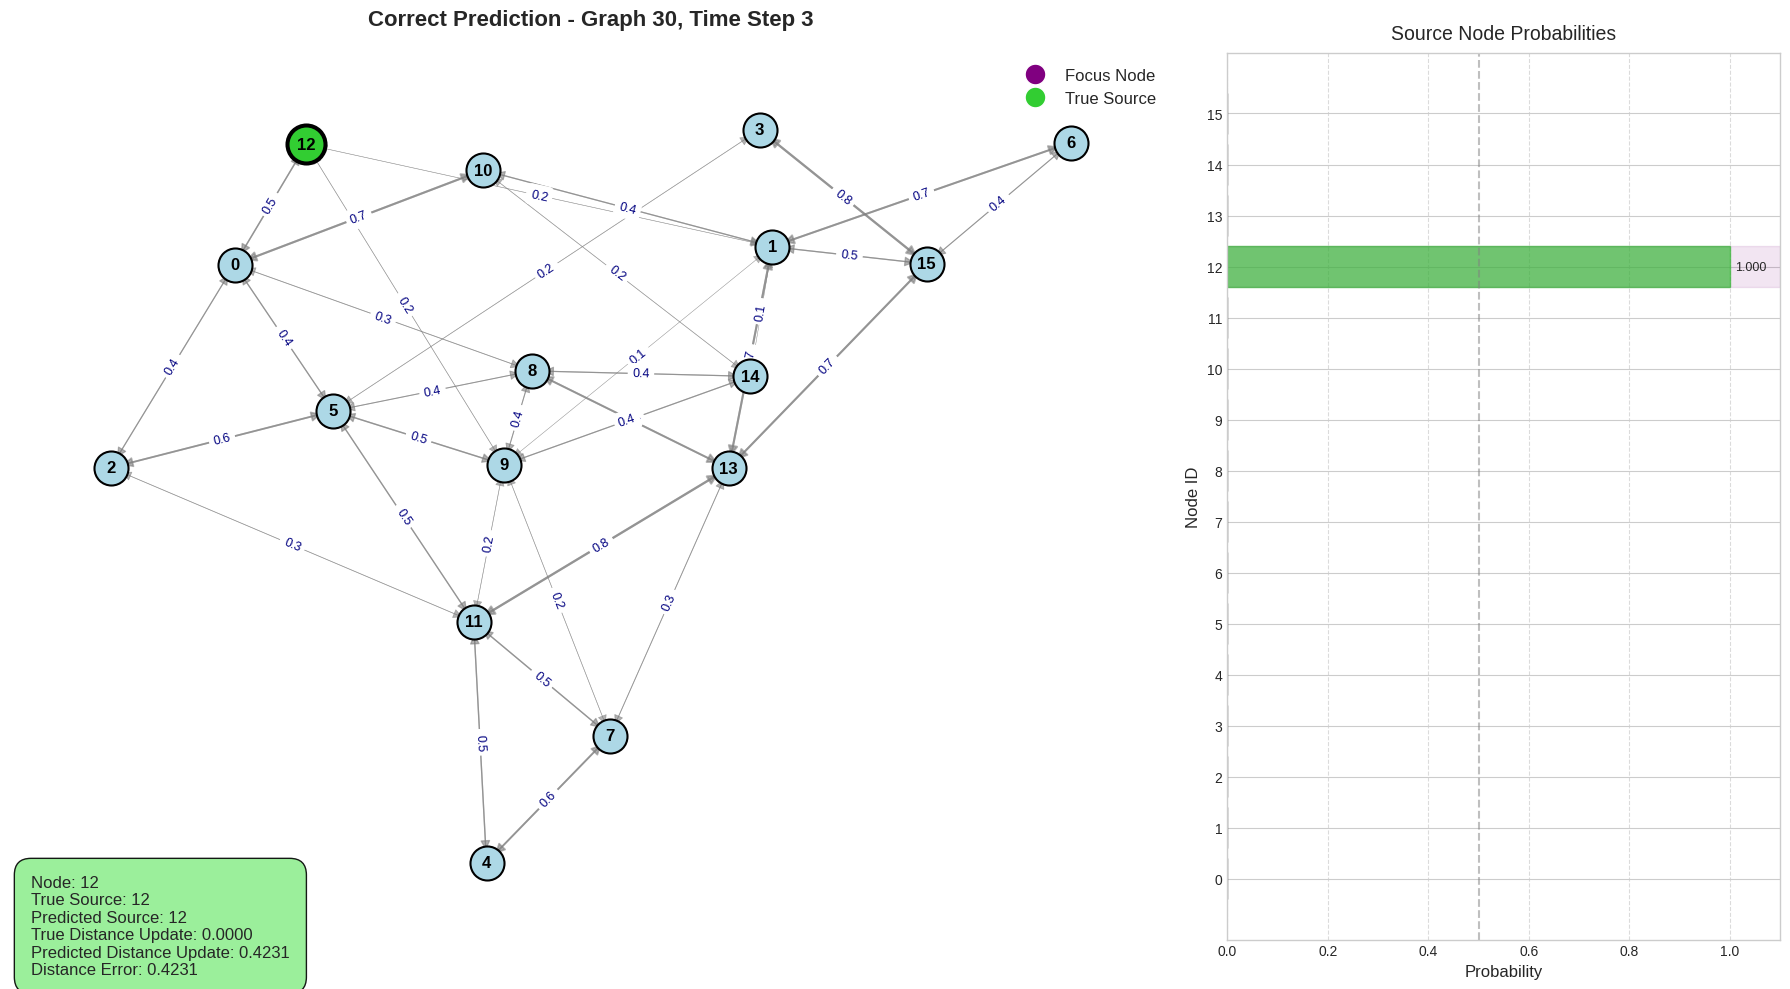


Visualizing example 2 (correct)...


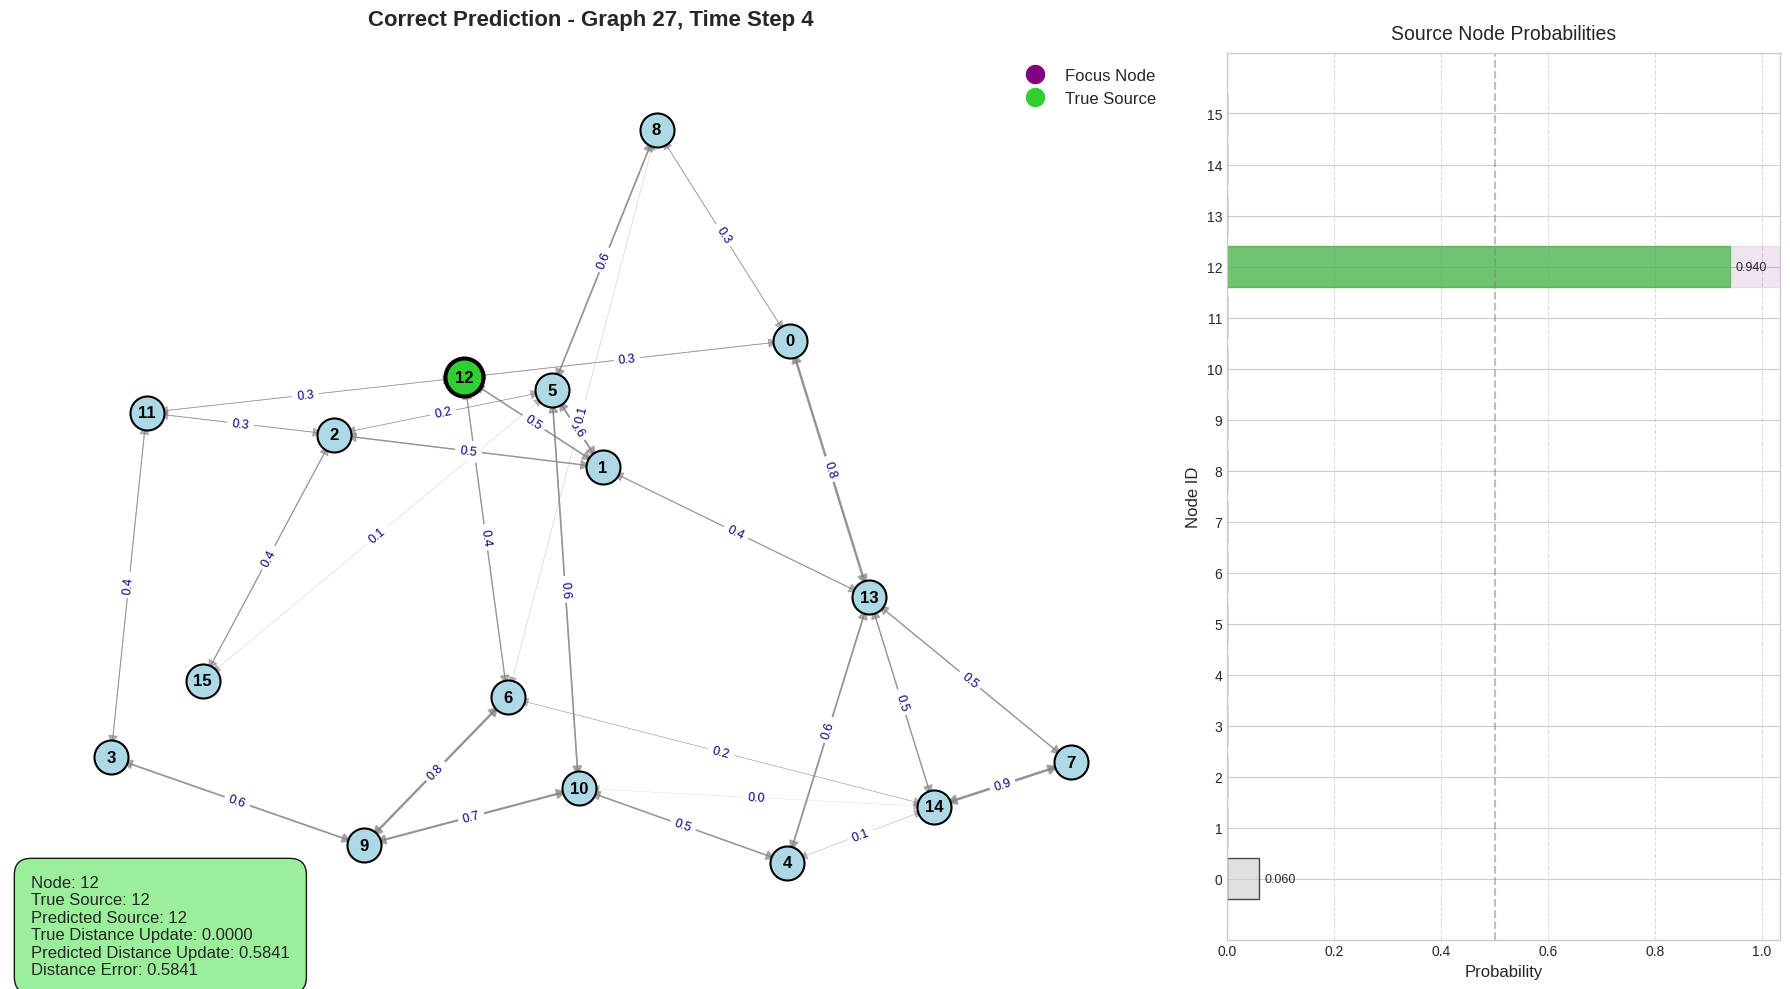


Visualizing example 3 (correct)...


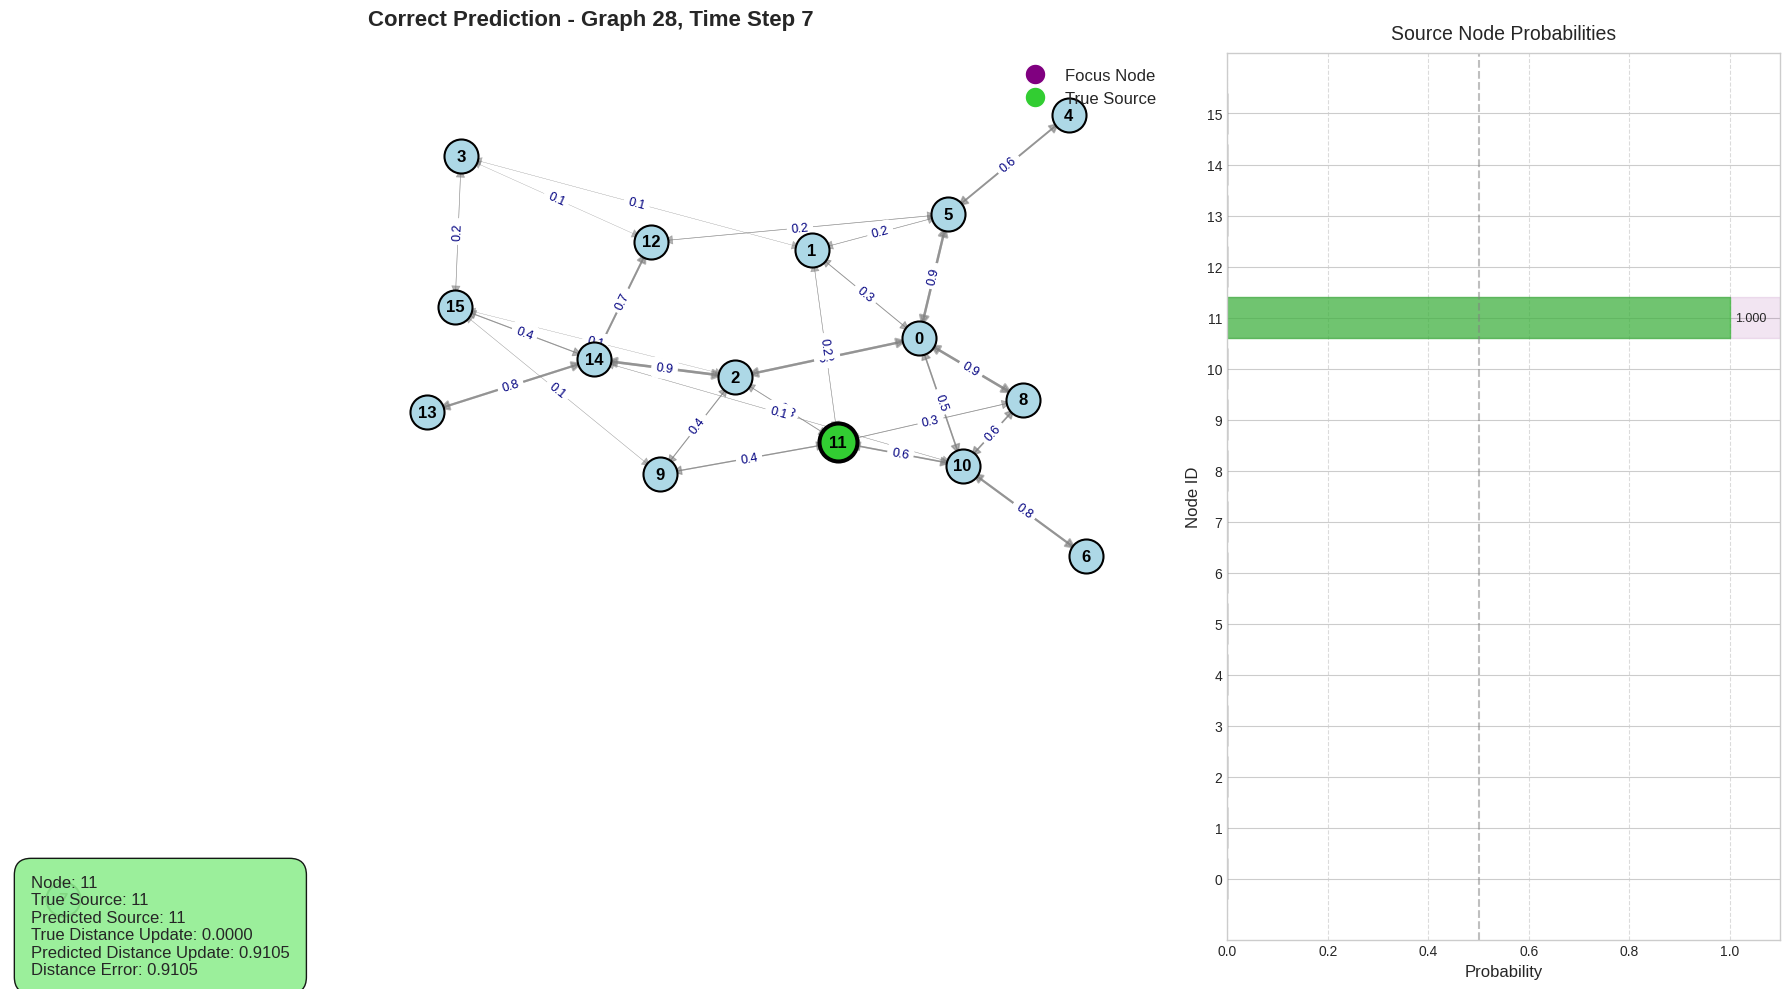


Visualizing example 4 (correct)...


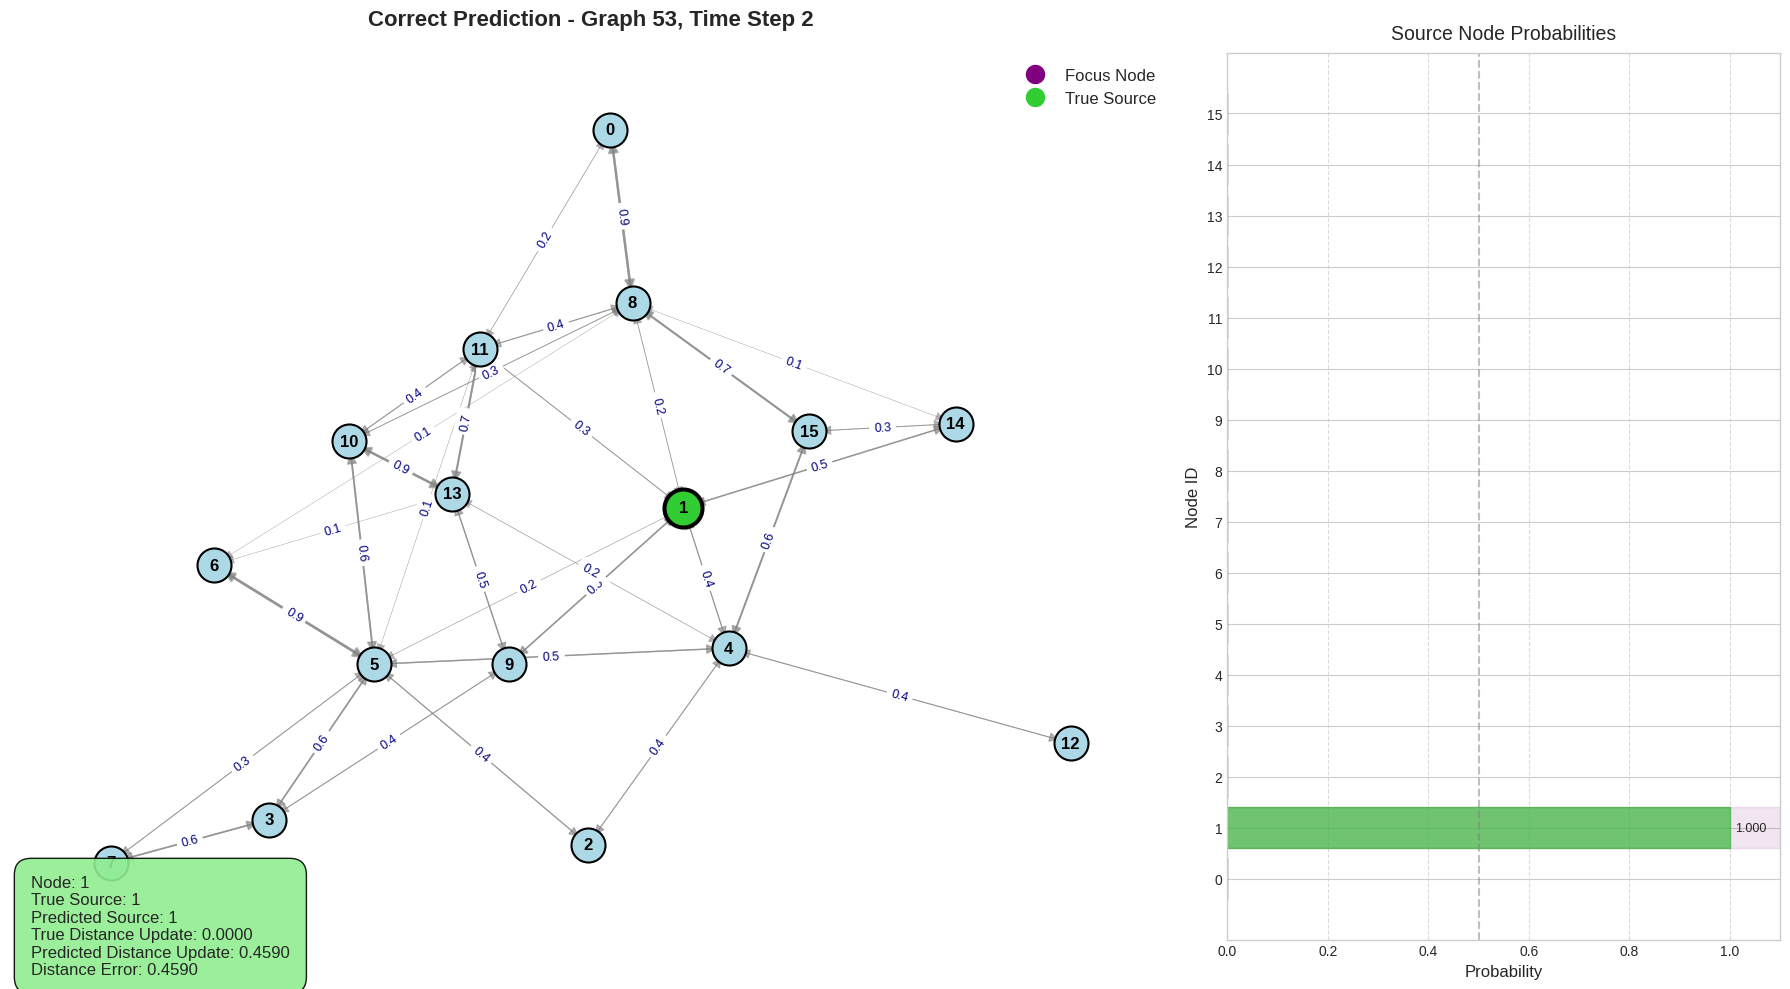


Visualizing example 5 (correct)...


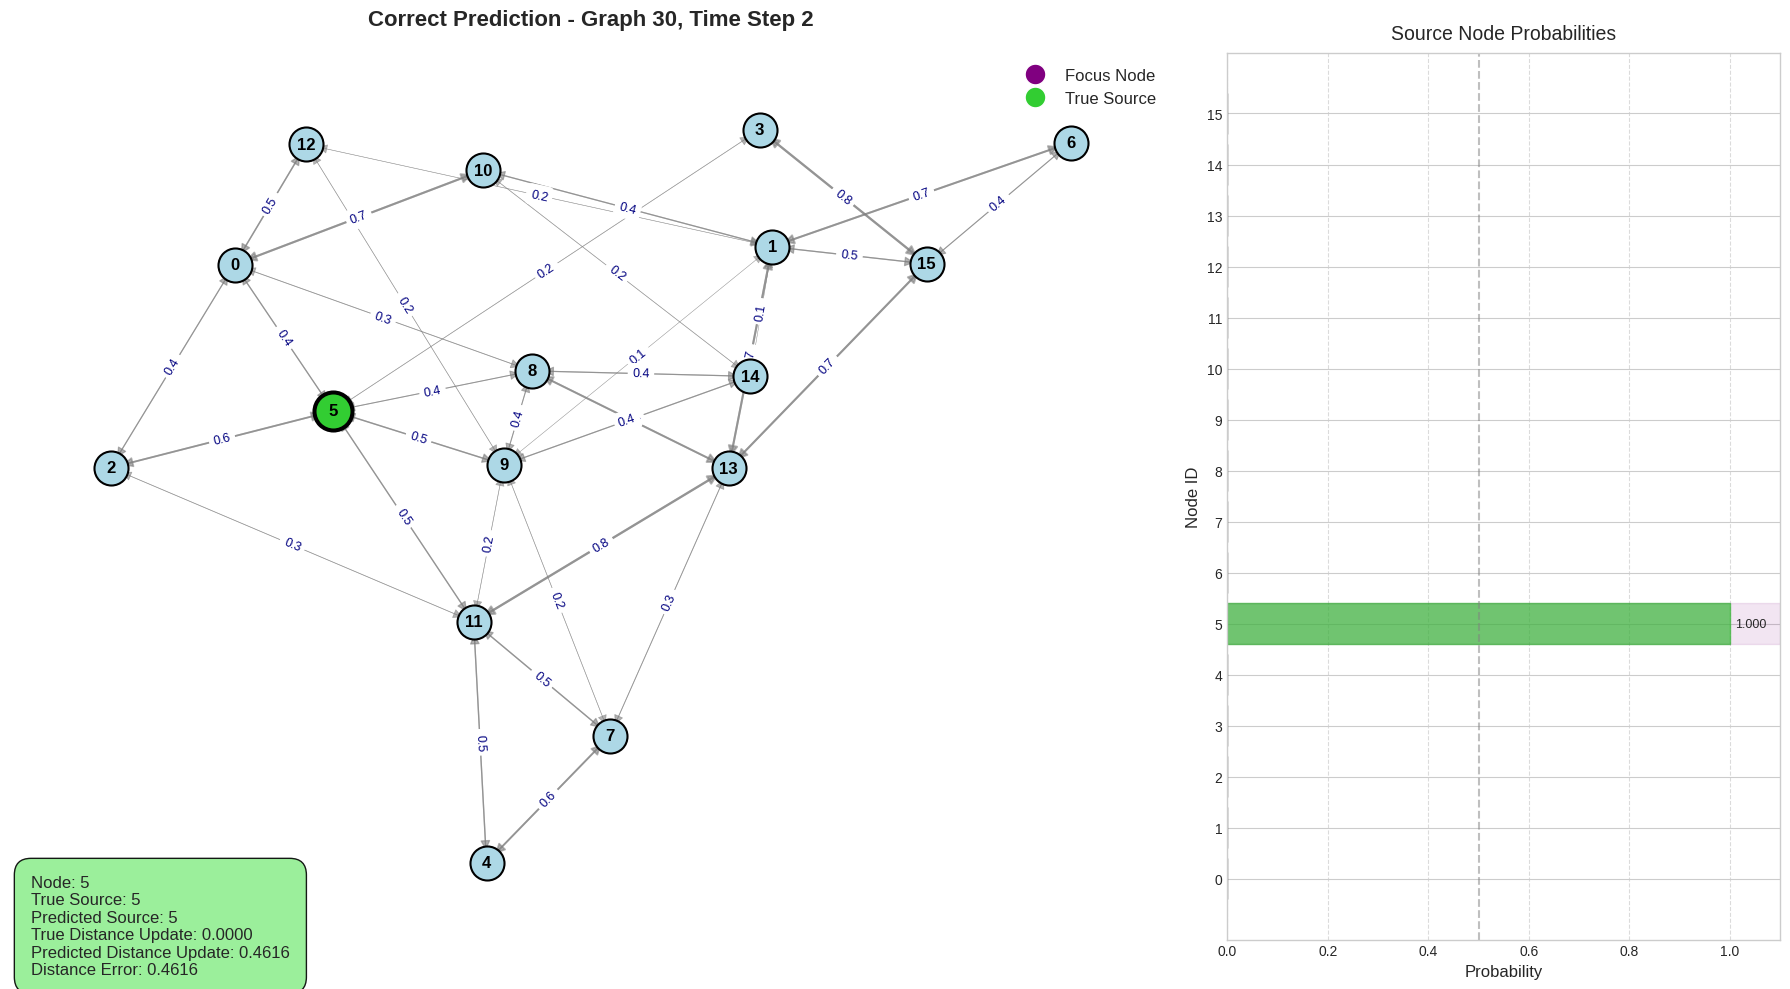



Visualizing error example 1...


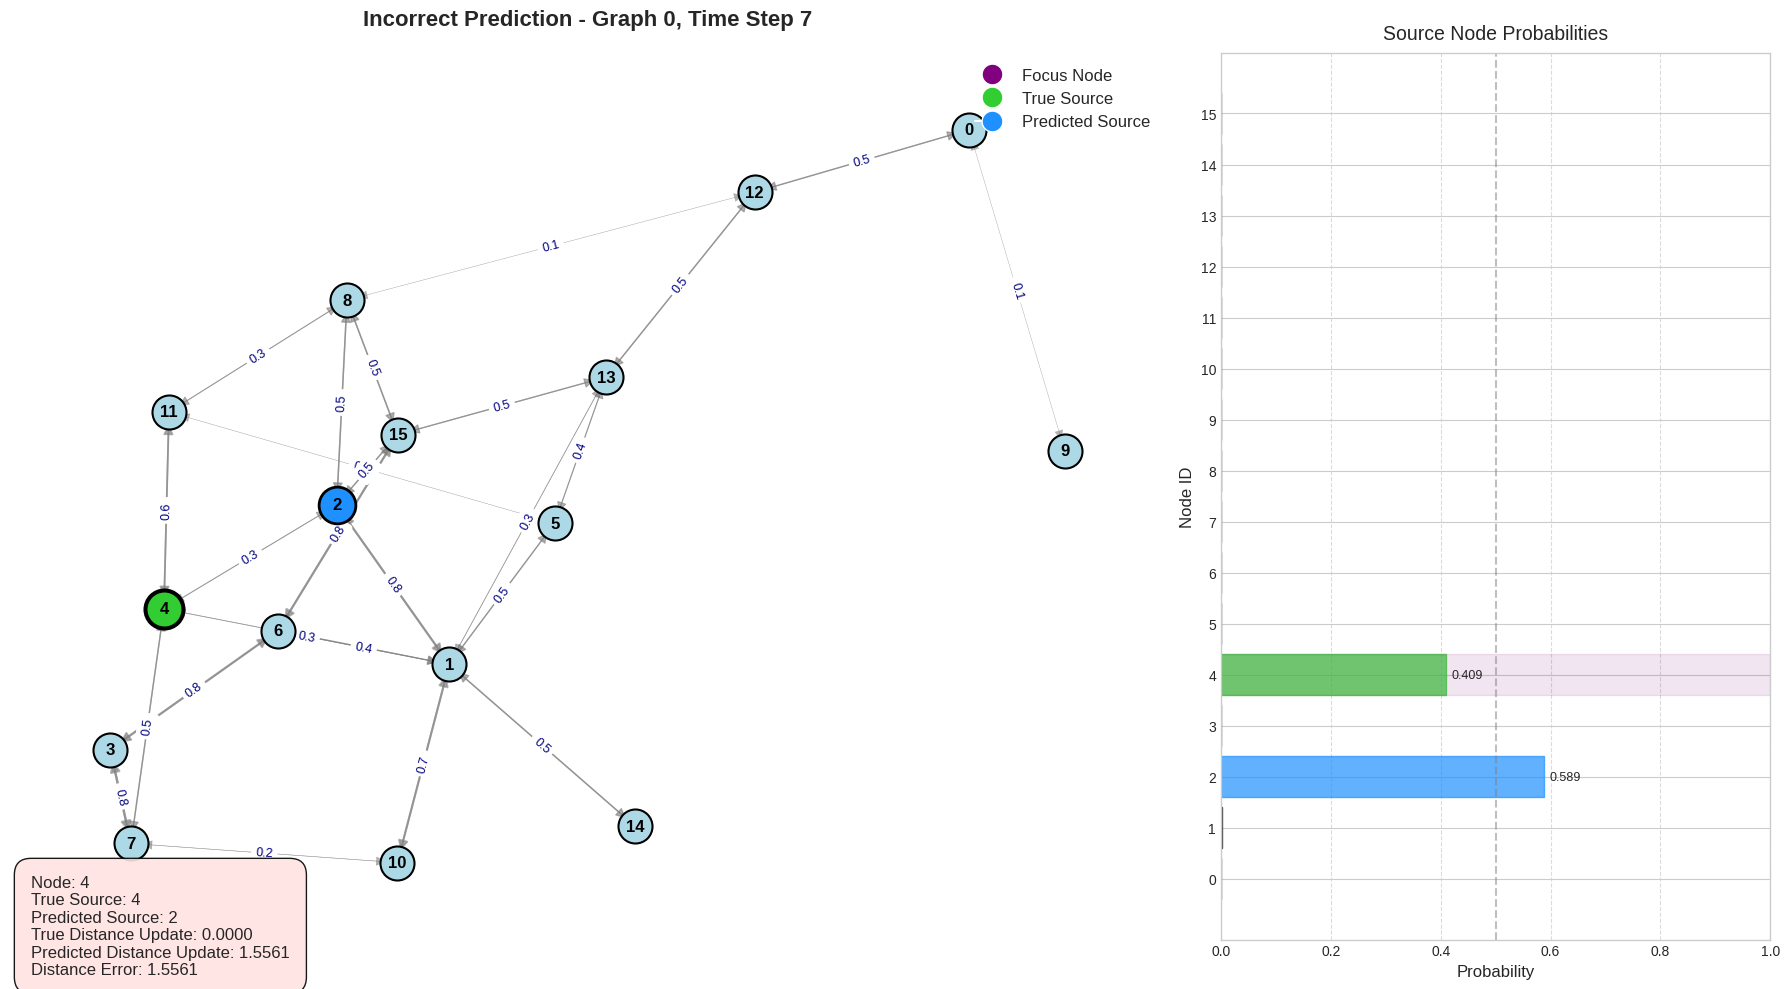


Visualizing error example 2...


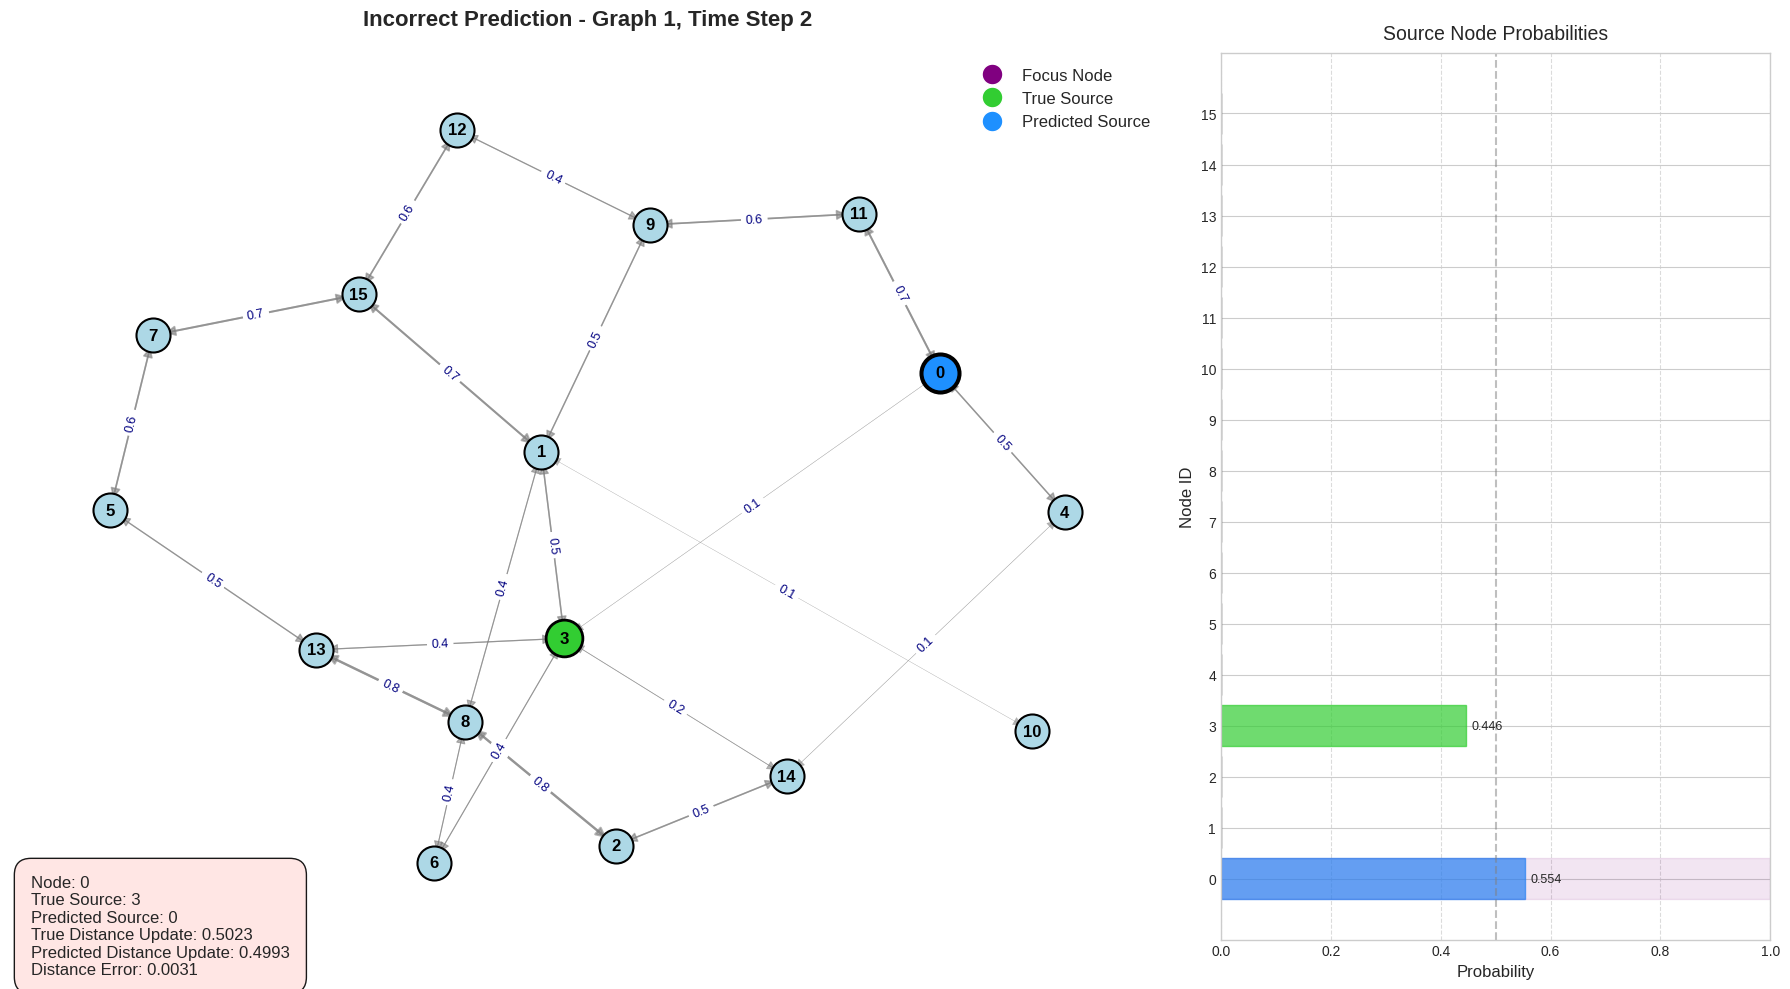


Visualizing error example 3...


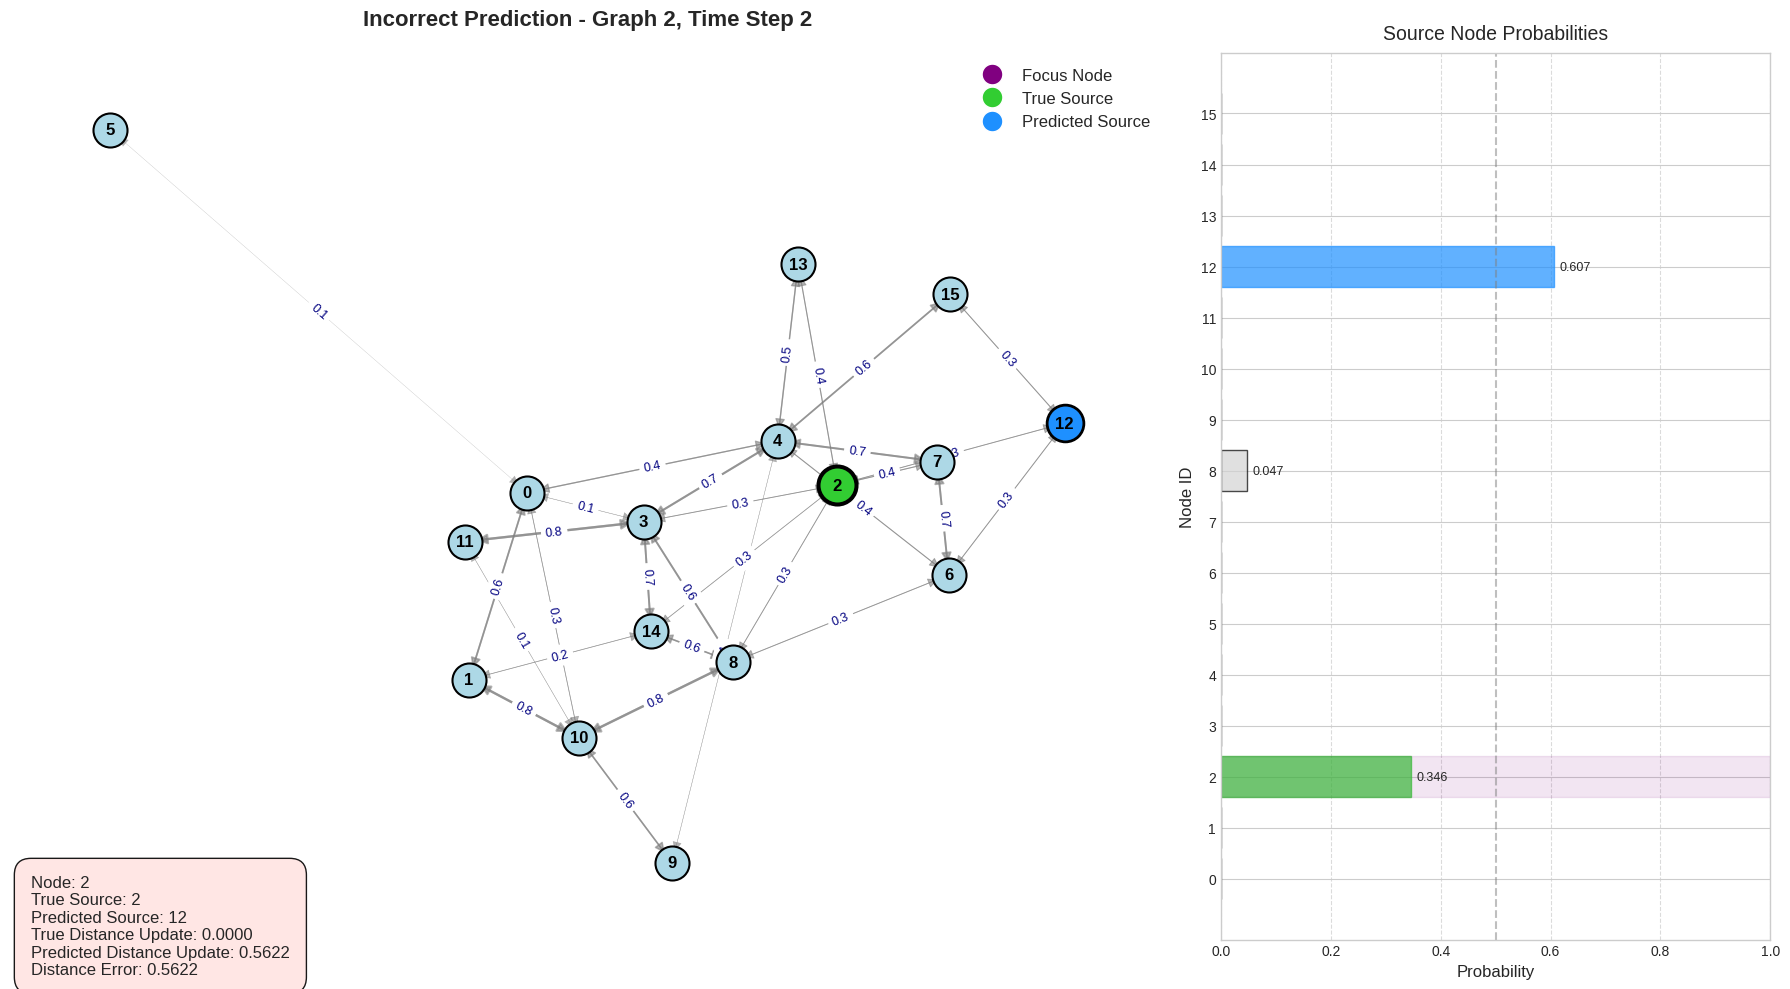


Visualizing error example 4...


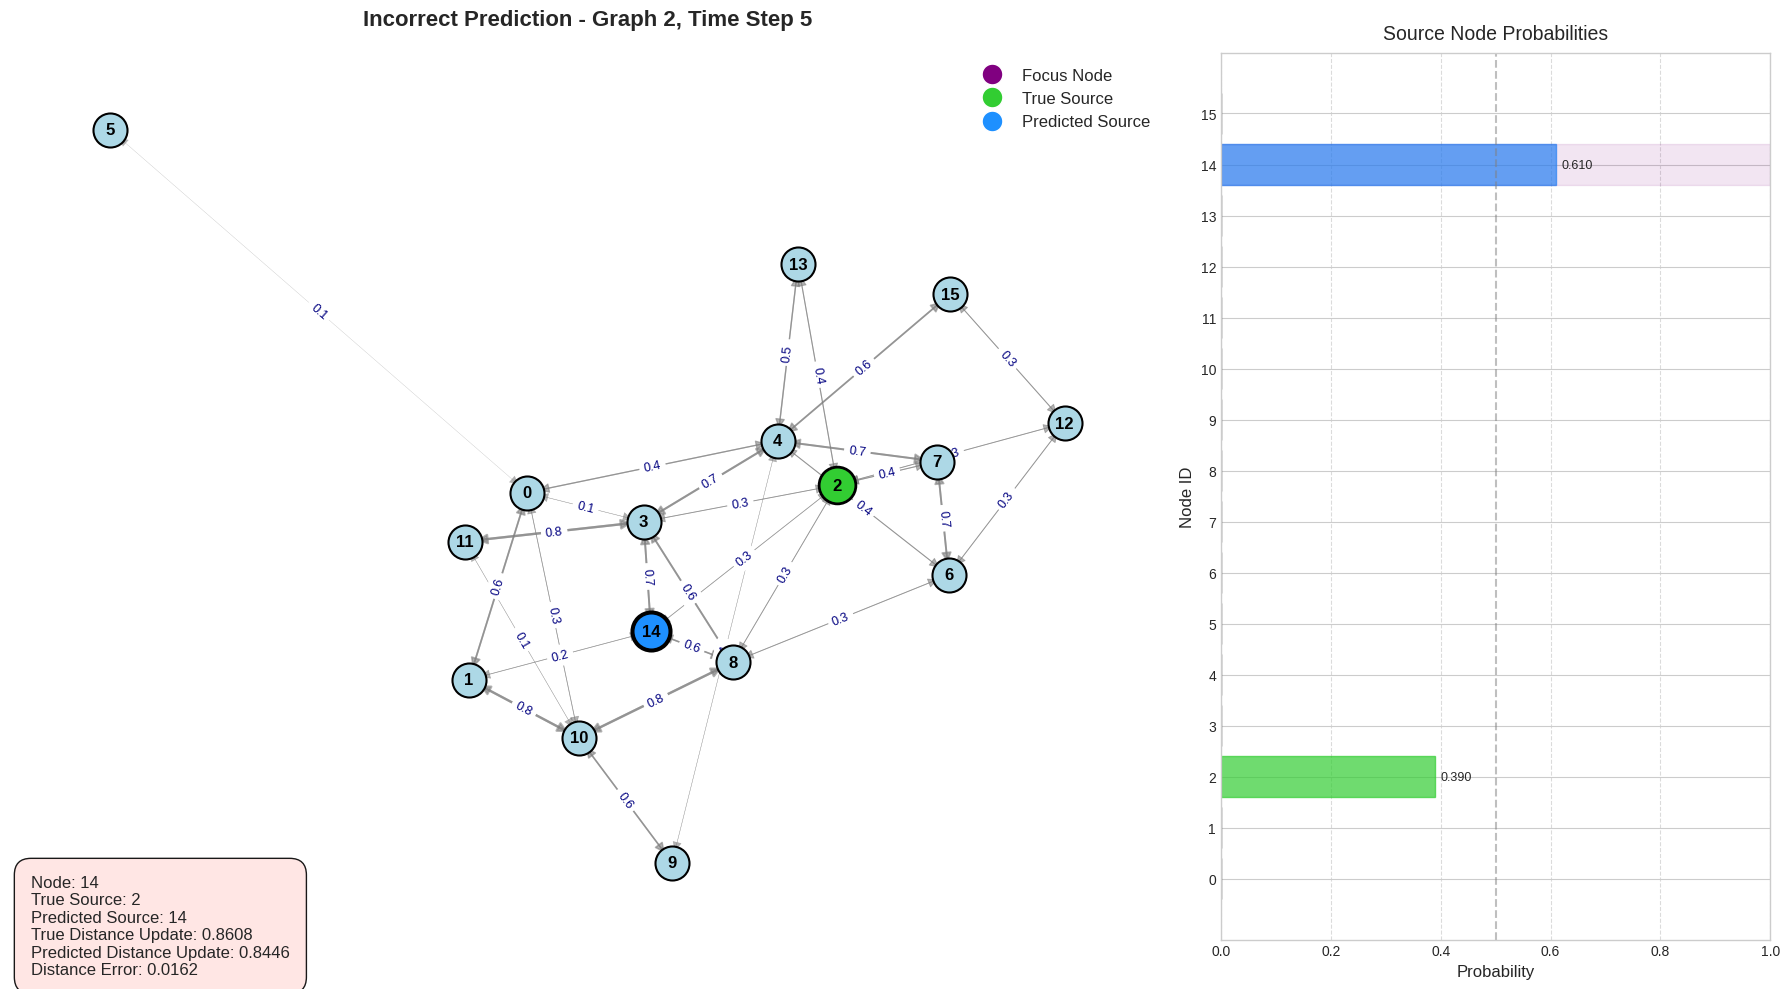


Visualizing error example 5...


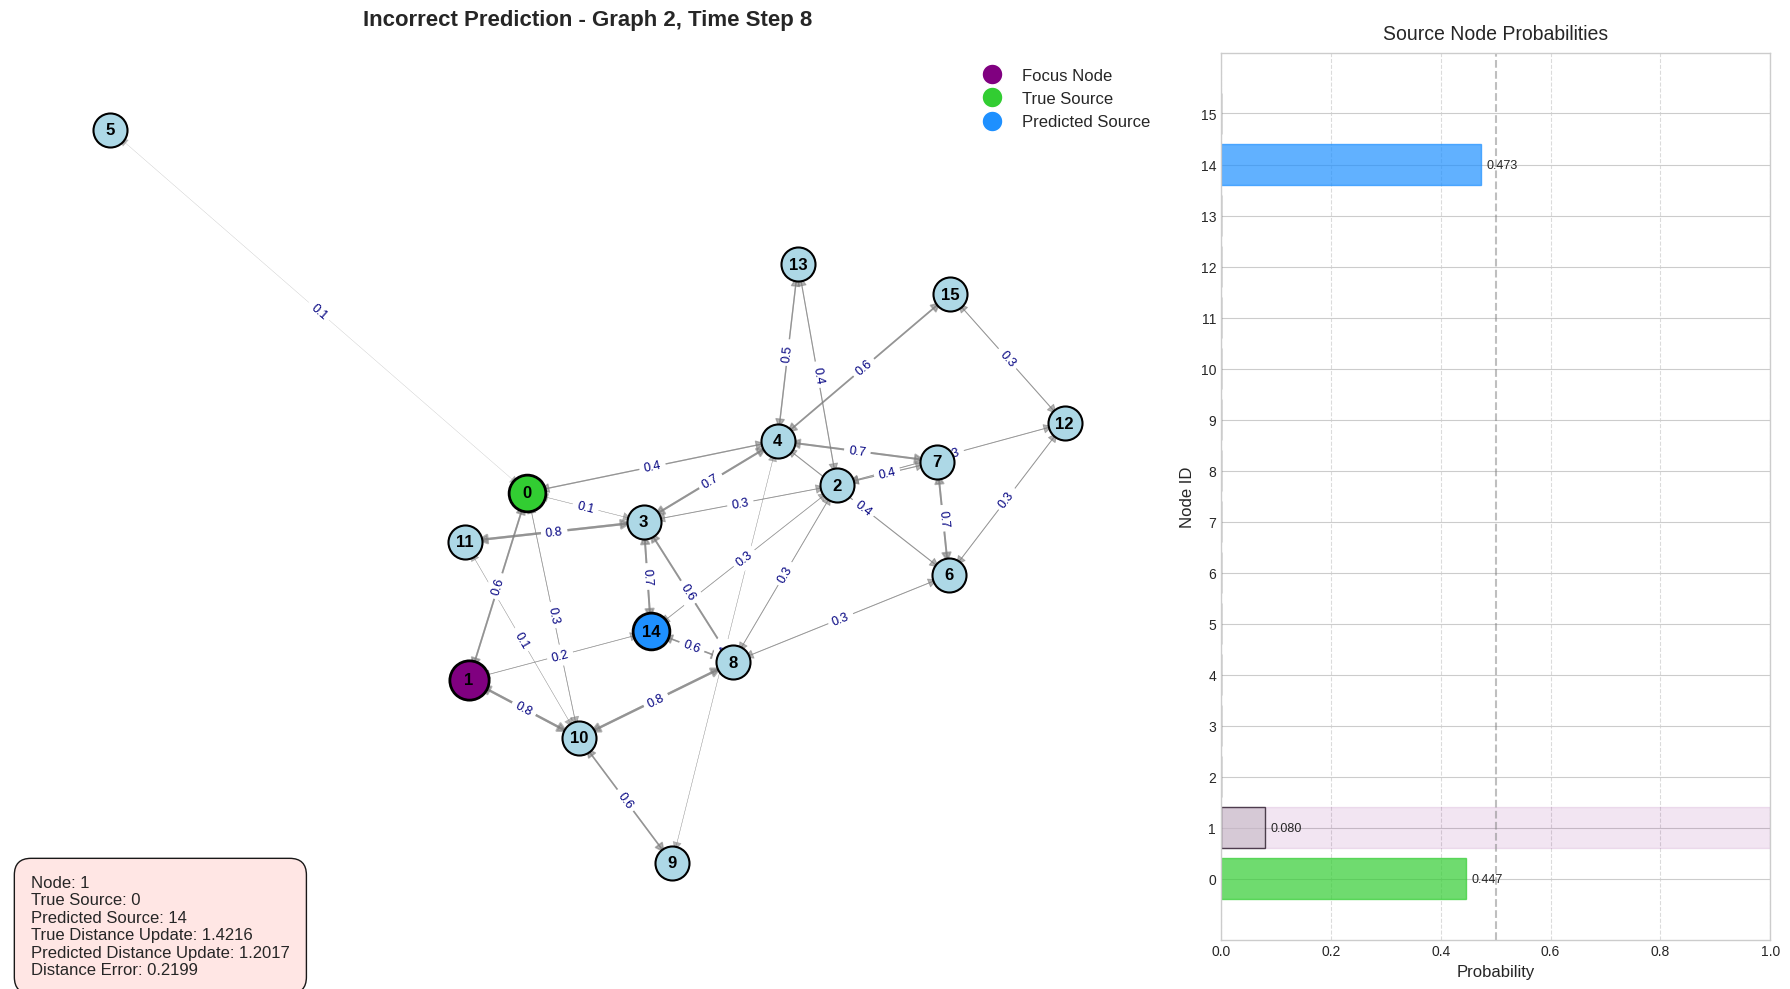

In [2]:
# Import the new analysis functions
from interp.evaluation import analyze_examples, visualize_example, visualize_examples_summary, analyze_model_behavior

# Load a model for analysis
from interp.config import create_model_from_config, load_config
import torch
import os
import random

# Choose an algorithm and model to analyze
alg = "dijkstra"  # or "bellman_ford" or "bfs" etc
model_name = "gnn_small_all"
checkpoint_source = os.path.join("interp_checkpoints", alg, model_name)

# Load the model
config = load_config(os.path.join(checkpoint_source, model_name + "_config.json"))
model = create_model_from_config(config)
model.load_state_dict(torch.load(os.path.join(checkpoint_source, model_name + ".pth")))
model.eval()

# Choose a dataset for analysis
dataset_path = os.path.join("data", alg, "interp_data_16_eval.h5")
nested = False  # Set to True for joint models

# Create a dataset and dataloader
from interp.dataset import HDF5Dataset, custom_collate, nested_custom_collate
from torch.utils.data import DataLoader

dataset = HDF5Dataset(dataset_path, nested=nested)
collate_fn = nested_custom_collate if nested else custom_collate
dataloader = DataLoader(dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Option 1: Comprehensive model behavior analysis
print("Performing comprehensive model behavior analysis...")
results, examples = analyze_model_behavior(model, dataloader, device, num_examples=10000)

# Option 2: Analyze specific examples
print("\nCollecting a mix of correct and incorrect examples...")
mixed_examples = analyze_examples(model, dataloader, device, num_examples=10000, error_only=False)

# Visualize the first few examples
for i, example in enumerate(random.sample(mixed_examples, 5)):
    print(f"\nVisualizing example {i+1} ({'correct' if example['is_correct'] else 'incorrect'})...")
    visualize_example(example)

# Option 3: Focus on error examples only
print("\nCollecting error examples only...")
error_examples = analyze_examples(model, dataloader, device, num_examples=5, error_only=True)

# Visualize all error examples
for i, example in enumerate(error_examples):
    print(f"\nVisualizing error example {i+1}...")
    visualize_example(example)

# Close the dataset when done
dataset.close()

## Analyse joint statistics

Evaluating: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_tickl

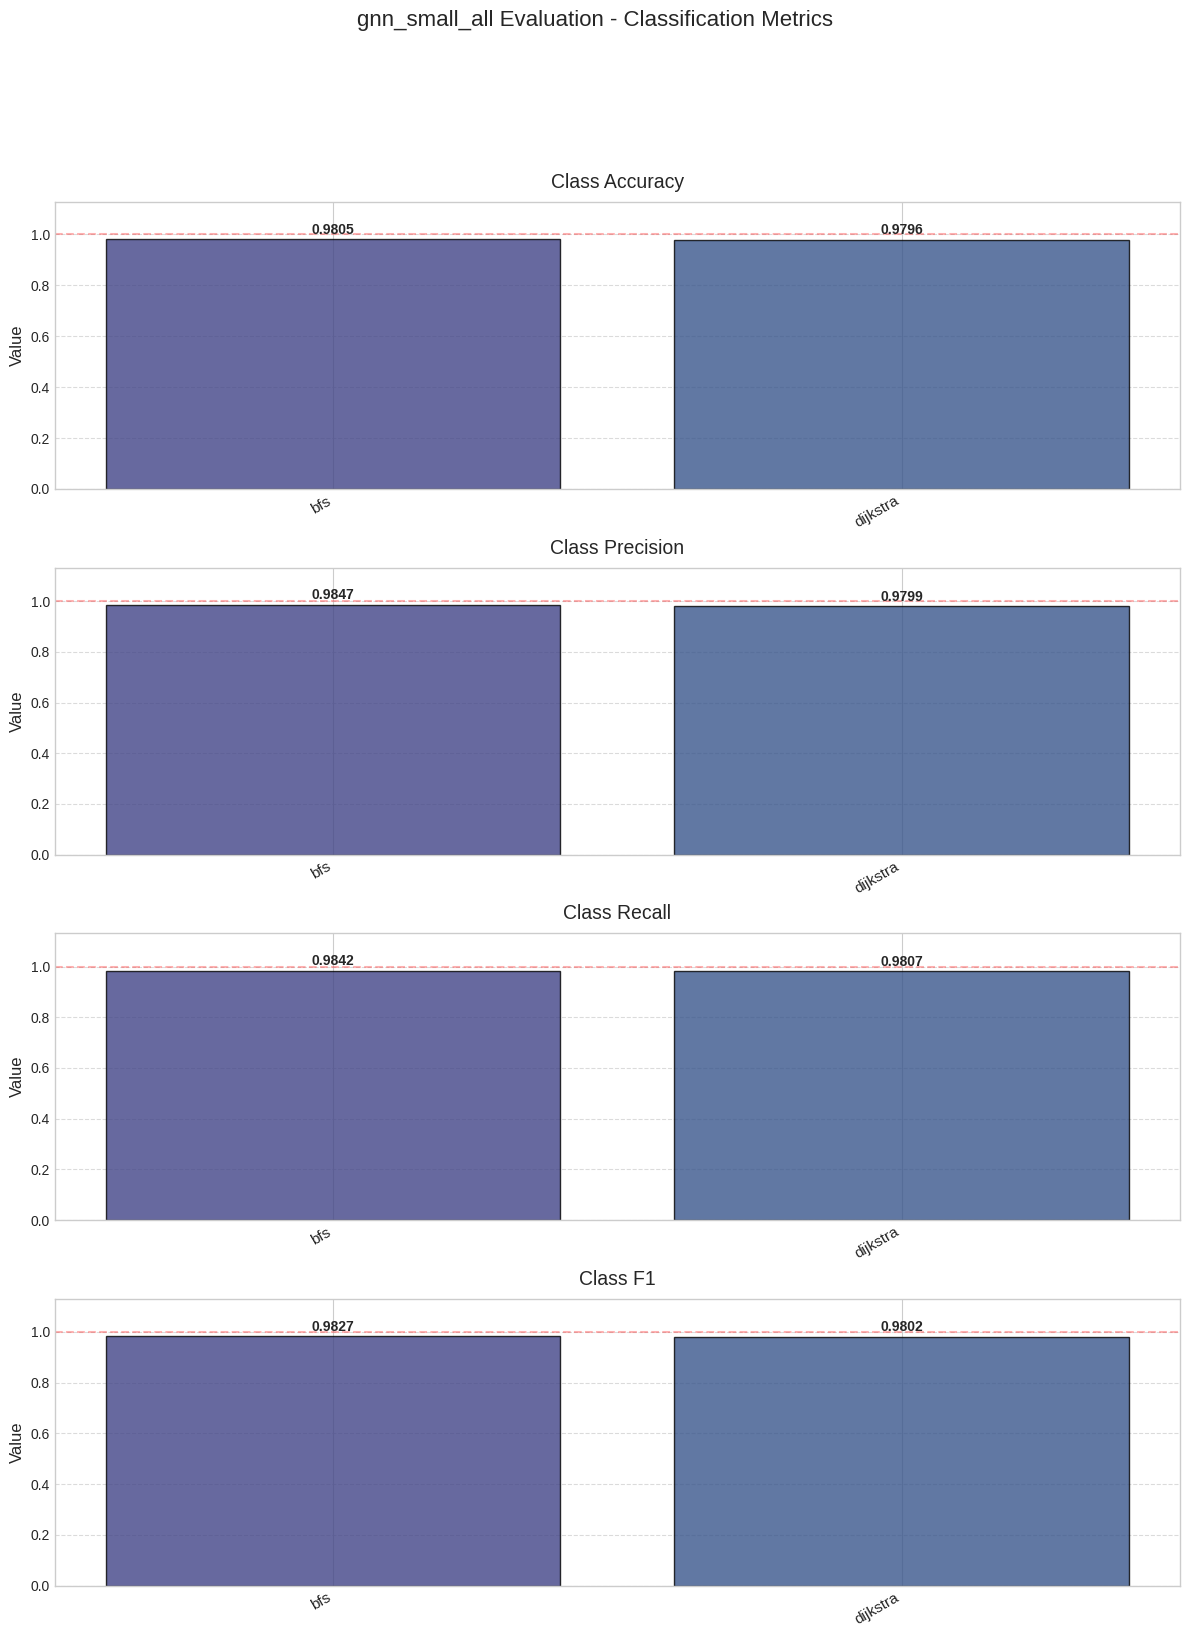

/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)


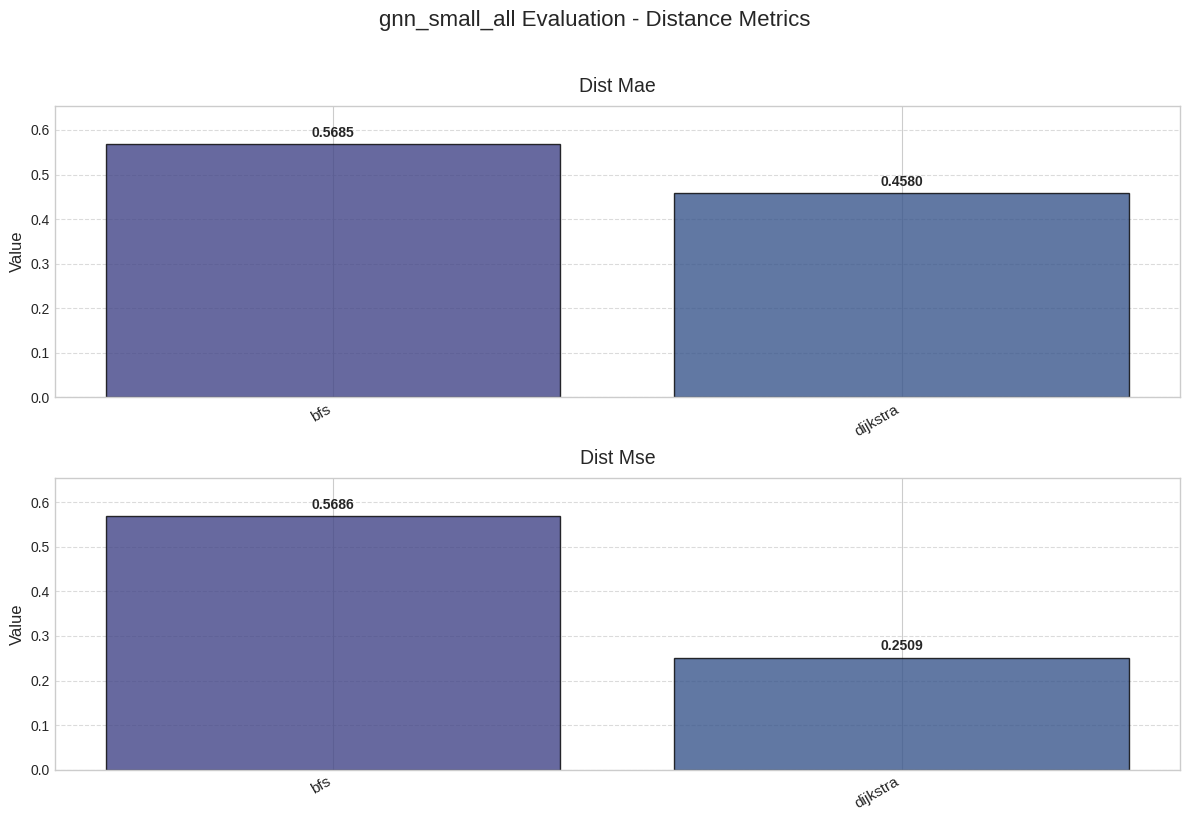

/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

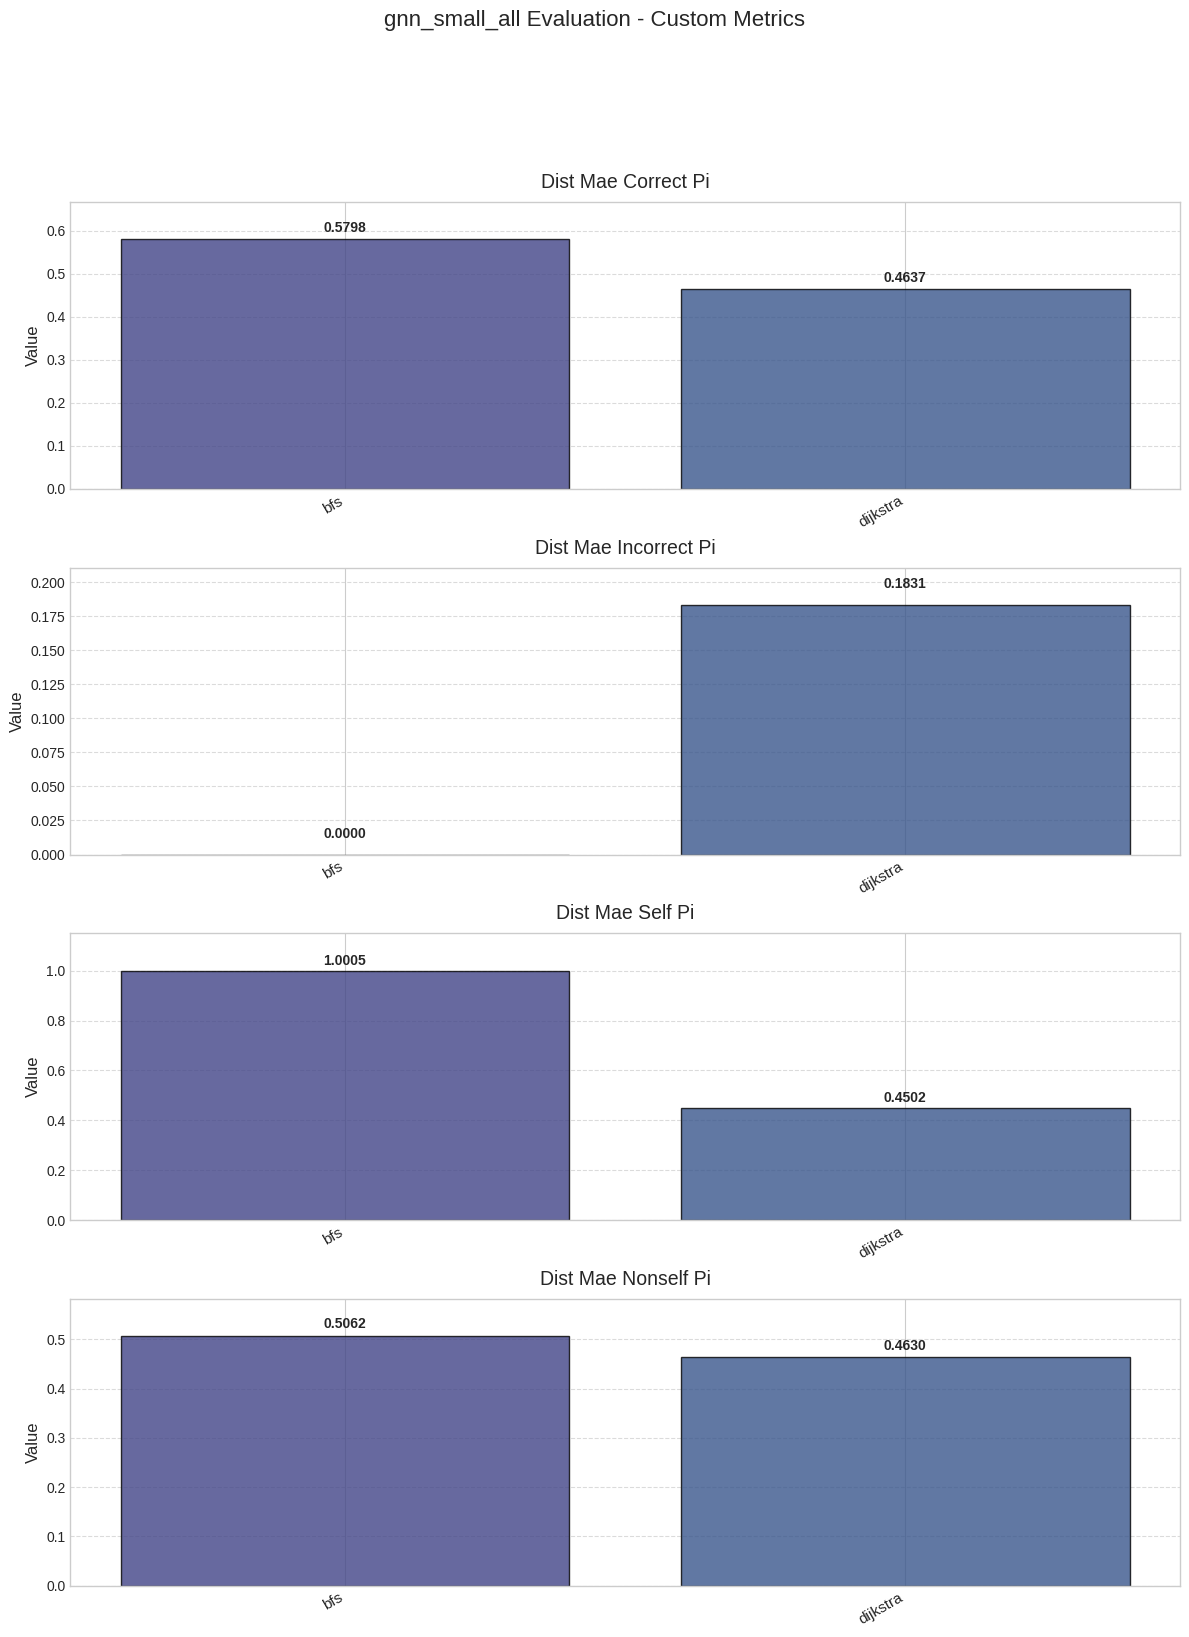

/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)


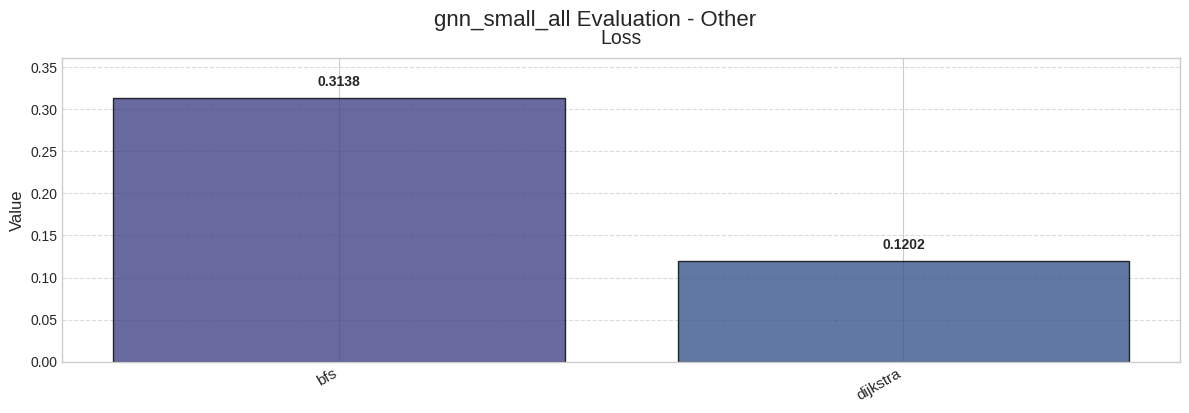

In [3]:
from interp.config import load_config, create_model_from_config
from interp.evaluation import evaluate_model_on_dataset, visualize_results
import torch
import os

# Path to the saved model and its configuration
checkpoint_dir = "interp_checkpoints/dijkstra_bfs/gnn_small_all"
model_name = "gnn_small_all"
config_path = os.path.join(checkpoint_dir, f"{model_name}_config.json")
model_path = os.path.join(checkpoint_dir, f"{model_name}.pth")

# Load the configuration
config = load_config(config_path)

# Create the model from the configuration
model = create_model_from_config(config)

# Load the saved weights
model.load_state_dict(torch.load(model_path))

# Evaluate the model
results = evaluate_model_on_dataset(
    model, 
    dataset_path="data/dijkstra_bfs/interp_data_OOD_eval.h5",
    batch_size=16,
    nested=True
)

# Visualize the results
visualize_results(results, title=f"{model_name} Evaluation")
